# Задачи

1. Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

2. Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.

3. Сколько транзакций завершились ошибкой?

4. Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.

5. Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.

---

In [32]:
# 1
import pandas as pd

transactions = pd.read_csv('transaction_data.csv')
transactions.shape

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


(5315, 3)

In [33]:
transactions.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [34]:
transactions.dtypes

date           object
name           object
transaction    object
dtype: object

In [35]:
transactions.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


In [36]:
# 2
transaction_distribution = transactions.transaction.value_counts()

<Axes: xlabel='transaction', ylabel='count'>

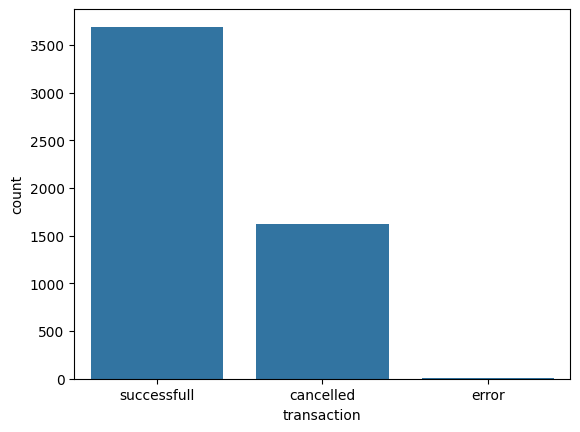

In [37]:
import seaborn as sns
sns.barplot(x=transaction_distribution.index, y=transaction_distribution)

In [38]:
# 3
transaction_distribution

transaction
successfull    3692
cancelled      1619
error             4
Name: count, dtype: int64

/tmp/ipykernel_3667/2210644497.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transactions_per_user, kde=False)


<Axes: >

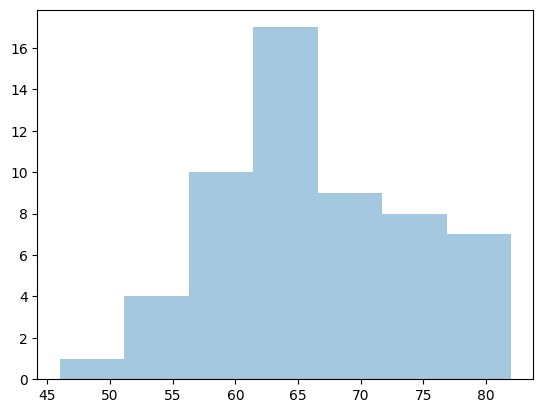

In [39]:
# 4
transactions_per_user = transactions.query('transaction == "successfull"') \
                                    .groupby('name') \
                                    .agg({'transaction':'count'})

sns.distplot(transactions_per_user, kde=False)

In [40]:
# 5
transactions_updated = pd.read_csv('transaction_data_updated.csv')

In [41]:
transactions_updated.date = transactions_updated.minute
user_vs_minute_pivot = transactions_updated \
    .groupby(['name', 'date'], as_index=False) \
    .agg({'minute':'count'}) \
    .pivot(index='date', columns='name', values='minute') \
    .fillna(0)